# Water quality (Machine Learning)
Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from numpy import isnan
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


Helps interface with the os

Reading the data

In [2]:
data=pd.read_csv(r'C:\Sudhir\DP\DP 3\final_1.csv')

In [3]:
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,31.6,6.5,33.6,NAN,0.1,11,27,2014.0
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189,2,0.2,4953,8391,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,NAN,7.9,7.2,738,2.7,0.518,5000,202,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29,7.5,6.3,585,2.6,0.155,7000,315,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28,7.6,6.2,98,1.2,NAN,9500,570,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28,7.7,6.5,91,1.3,NAN,3050,562,2003.0


Checking the data types

In [4]:
data.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                 object
D.O. (mg/l)                          object
PH                                   object
CONDUCTIVITY (mhos/cm)               object
B.O.D. (mg/l)                        object
NITRATENAN N+ NITRITENANN (mg/l)     object
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean       object
year                                float64
dtype: object

In [5]:
# Changing the datatypes to numeric
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['CONDUCTIVITY (mhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (mhos/cm)'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')

In [6]:
data.dtypes

STATION CODE                        float64
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (mhos/cm)              float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                float64
dtype: object

In [7]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

In [8]:
start=1
end=1990
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [9]:
data = data.drop([0,1])

In [10]:
data = data.fillna(data.mean())
data

,STATION CODE,LOCATIONS,STATE,Temp,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),FECAL COLIFORM (MPN/100ml),TOTAL COLIFORM (MPN/100ml)Mean,year
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.800000,5.7,7.2,189.0,2.0,0.200000,4953.0,8391.0,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,29.500000,6.3,6.9,179.0,1.7,0.100000,3243.0,5330.0,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,29.700000,5.8,6.9,64.0,3.8,0.500000,5382.0,8443.0,2014.0
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,29.500000,5.8,7.3,83.0,1.9,0.400000,3428.0,5500.0,2014.0
6,1400.0,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,30.000000,5.5,7.4,81.0,1.5,0.100000,2853.0,4049.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,26.207501,7.9,7.2,738.0,2.7,0.518000,5000.0,202.0,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,29.000000,7.5,6.3,585.0,2.6,0.155000,7000.0,315.0,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,28.000000,7.6,6.2,98.0,1.2,1.622091,9500.0,570.0,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,28.000000,7.7,6.5,91.0,1.3,1.622091,3050.0,562.0,2003.0


In [11]:

columns = ['STATION CODE','LOCATIONS','STATE','Temp','D.O. (mg/l)','PH','CONDUCTIVITY (µmhos/cm)','B.O.D. (mg/l)','NITRATENAN N+ NITRITENANN (mg/l)','FECAL COLIFORM (MPN/100ml)','TOTAL COLIFORM (MPN/100ml)Mean']

In [12]:
data = data.drop(['Temp','FECAL COLIFORM (MPN/100ml)'],axis = 1)
data

,STATION CODE,LOCATIONS,STATE,D.O. (mg/l),PH,CONDUCTIVITY (mhos/cm),B.O.D. (mg/l),NITRATENAN N+ NITRITENANN (mg/l),TOTAL COLIFORM (MPN/100ml)Mean,year
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200000,8391.0,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100000,5330.0,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500000,8443.0,2014.0
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400000,5500.0,2014.0
6,1400.0,"MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA",GOA,5.5,7.4,81.0,1.5,0.100000,4049.0,2014.0
...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518000,202.0,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155000,315.0,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,1.622091,570.0,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,1.622091,562.0,2003.0


In [13]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data.columns = ['station','location','state','do','ph','co','bod','na','tc','year']

data

,station,location,state,do,ph,co,bod,na,tc,year
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,NaN,0.100,NaN,2014.0
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200,8391.0,2014.0
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100,5330.0,2014.0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014.0
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014.0
...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518,202.0,2003.0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155,315.0,2003.0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,NaN,570.0,2003.0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,NaN,562.0,2003.0


In [14]:
#calculation of Ph
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))
#calculation of dissolved oxygen
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))
#calculation of total coliform
data['nco']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))
#calc of B.O.D
data['nbod']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))
#calculation of electrical conductivity
data['nec']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))
#Calulation of nitrate
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))



In [15]:
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,NaN,0.100,NaN,2014.0,40,100,0,0,100,100
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.0,0.200,8391.0,2014.0,100,80,40,100,60,100
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.7,0.100,5330.0,2014.0,80,100,40,100,60,100
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.8,0.500,8443.0,2014.0,80,80,40,80,100,100
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.9,0.400,5500.0,2014.0,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.7,0.518,202.0,2003.0,100,100,60,100,0,100
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.6,0.155,315.0,2003.0,0,100,60,100,0,100
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.2,NaN,570.0,2003.0,0,100,40,100,80,0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.3,NaN,562.0,2003.0,40,100,40,100,80,0


In [16]:
data = data.fillna(data.mean())
data

,station,location,state,do,ph,co,bod,na,tc,year,npH,ndo,nco,nbod,nec,nna
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,40,100,0,0,100,100
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,100,80,40,100,60,100
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,80,100,40,100,60,100
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,80,80,40,80,100,100
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,100,80,40,100,80,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,100,100,60,100,0,100
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,0,100,60,100,0,100
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,0,100,40,100,80,0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,40,100,40,100,80,0


In [17]:

Si_pH = 7.5
Si_BOD = 0.5
Si_Na = 5
Si_CO = 1500
Si_DO = 7
Si_EC = 275

Reci_Si= 1/Si_pH + 1/Si_BOD + 1/Si_Na + 1/Si_CO + 1/Si_DO + 1/Si_EC 

k= 1/Reci_Si

UW_pH = k/7.5
UW_BOD = k/1
UW_Na = k/20
UW_Co = k/4
UW_DO = k/10
UW_EC = k/75

print(k)
Summation_UW = UW_pH + UW_BOD + UW_Na + UW_Co + UW_DO + UW_EC

OW_pH = UW_pH/Summation_UW
OW_BOD = UW_BOD/Summation_UW
OW_Na = UW_Na/Summation_UW
OW_Co = UW_Co/Summation_UW
OW_DO = UW_DO/Summation_UW
OW_EC= UW_EC/Summation_UW

0.40314558267625844


In [18]:
data['wph']=(data.npH)
data['wdo']=(data.ndo)
data['wbod']=(data.nbod)
data['wec']=(data.nec)
data['wna']=(data.nna)
data['wco']=(data.nco)
data['wqi']=(OW_pH * data.wph+OW_BOD *data.wdo+ OW_Na *data.wbod+OW_Co *data.wec+OW_DO * data.wna+OW_EC *data.wco )
df1  = data

df1

,station,location,state,do,ph,co,bod,na,tc,year,...,nbod,nec,nna,wph,wdo,wbod,wec,wna,wco,wqi
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,...,0,100,100,40,100,0,100,100,0,90.732759
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,...,100,60,100,100,80,100,60,100,40,80.086207
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,...,100,60,100,80,100,100,60,100,40,91.293103
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,...,80,100,100,80,80,80,100,100,40,84.181034
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,...,100,80,100,100,80,100,80,100,40,83.318966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,...,100,0,100,100,100,100,0,100,60,83.491379
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,...,100,0,100,0,100,100,0,100,60,74.870690
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,...,100,80,0,0,100,100,80,0,40,81.163793
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,...,100,80,0,40,100,100,80,0,40,84.612069


In [19]:
dum = ['station','location','state']
data[dum]

,station,location,state
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA
3,1475.0,ZUARI AT PANCHAWADI,GOA
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA
...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA


In [20]:
df_dummy = pd.get_dummies(data[dum])
df= pd.concat([data, df_dummy], axis = 1)


In [21]:
dataframe = df1.drop(['station', 'year','do','ph','co','bod','na','tc','ndo','nbod','nec','nna','nco','npH'],axis =1)

columns = ['wdo','wbdo','wec','wna','wco','wph']
labels = ['wqi']
corr_matrix = dataframe.corr()
corr_matrix

,wph,wdo,wbod,wec,wna,wco,wqi
wph,1.000000,-0.005029,-0.110346,-0.161860,-0.066067,-0.084672,0.065784
wdo,-0.005029,1.000000,0.432197,0.336354,-0.025295,0.298060,0.933726
wbod,-0.110346,0.432197,1.000000,0.413296,0.017664,0.370868,0.516130
wec,-0.161860,0.336354,0.413296,1.000000,-0.004849,0.300124,0.611978
wna,-0.066067,-0.025295,0.017664,-0.004849,1.000000,-0.156561,0.073881
wco,-0.084672,0.298060,0.370868,0.300124,-0.156561,1.000000,0.339434
wqi,0.065784,0.933726,0.516130,0.611978,0.073881,0.339434,1.000000


In [22]:
dataframe

,location,state,wph,wdo,wbod,wec,wna,wco,wqi
1,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,40,100,0,100,100,0,90.732759
2,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,100,80,100,60,100,40,80.086207
3,ZUARI AT PANCHAWADI,GOA,80,100,100,60,100,40,91.293103
4,RIVER ZUARI AT BORIM BRIDGE,GOA,80,80,80,100,100,40,84.181034
5,RIVER ZUARI AT MARCAIM JETTY,GOA,100,80,100,80,100,40,83.318966
...,...,...,...,...,...,...,...,...,...
1981,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,100,100,100,0,100,60,83.491379
1982,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,0,100,100,0,100,60,74.870690
1983,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,0,100,100,80,0,40,81.163793
1984,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,40,100,100,80,0,40,84.612069


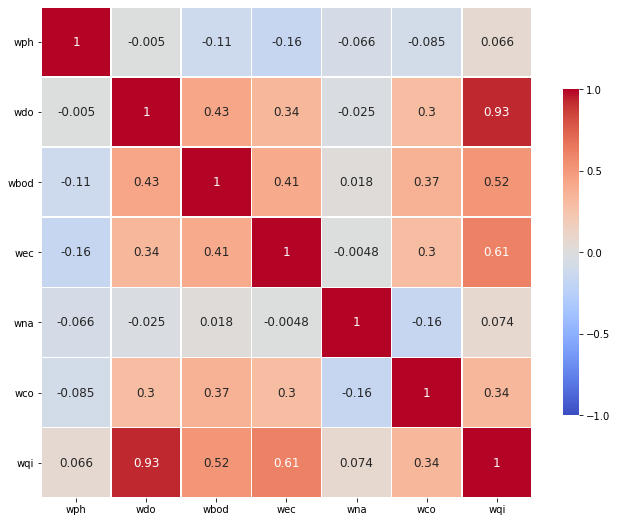

In [23]:
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [24]:
#calculation overall wqi for each year
ag=df1.groupby('station')['wqi'].mean()

In [25]:
ag.head()

station
17.0    70.403605
18.0    97.339342
20.0    95.399687
21.0    81.971003
42.0    98.800940
Name: wqi, dtype: float64

In [26]:
data=ag.reset_index(level=0,inplace=False)
data

,station,wqi
0,17.0,70.403605
1,18.0,97.339342
2,20.0,95.399687
3,21.0,81.971003
4,42.0,98.800940
...,...,...
314,3465.0,99.540230
315,3466.0,97.385057
316,3468.0,98.965517
317,3471.0,99.597701


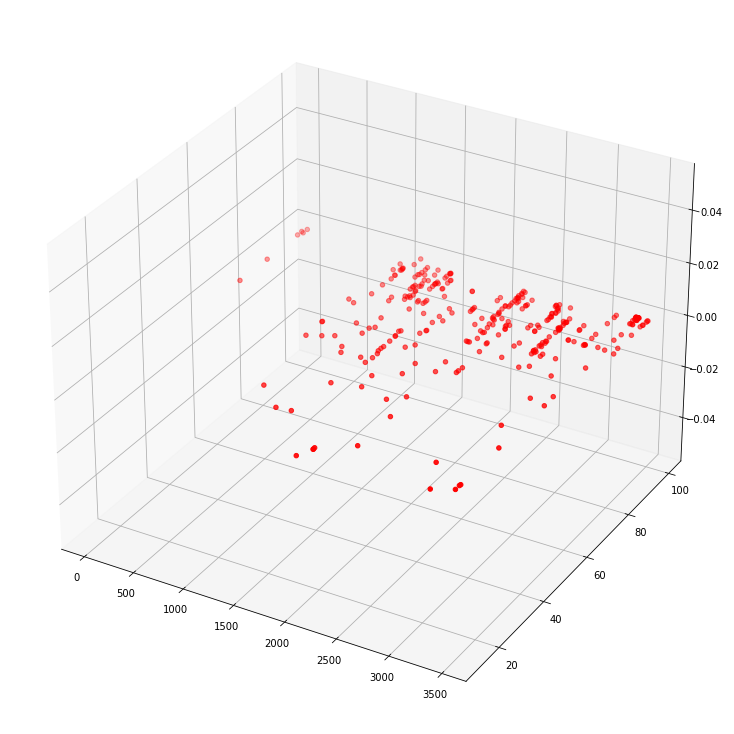

,station,wqi
0,17.0,70.403605
1,18.0,97.339342
2,20.0,95.399687
3,21.0,81.971003
4,42.0,98.800940
...,...,...
314,3465.0,99.540230
315,3466.0,97.385057
316,3468.0,98.965517
317,3471.0,99.597701


In [27]:
#visualizing the filttered data

station=data['station'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(station,AQI, color='red')
plt.show()
data

In [28]:
data = data[np.isfinite(data['wqi'])]
data.head()

,station,wqi
0,17.0,70.403605
1,18.0,97.339342
2,20.0,95.399687
3,21.0,81.971003
4,42.0,98.800940


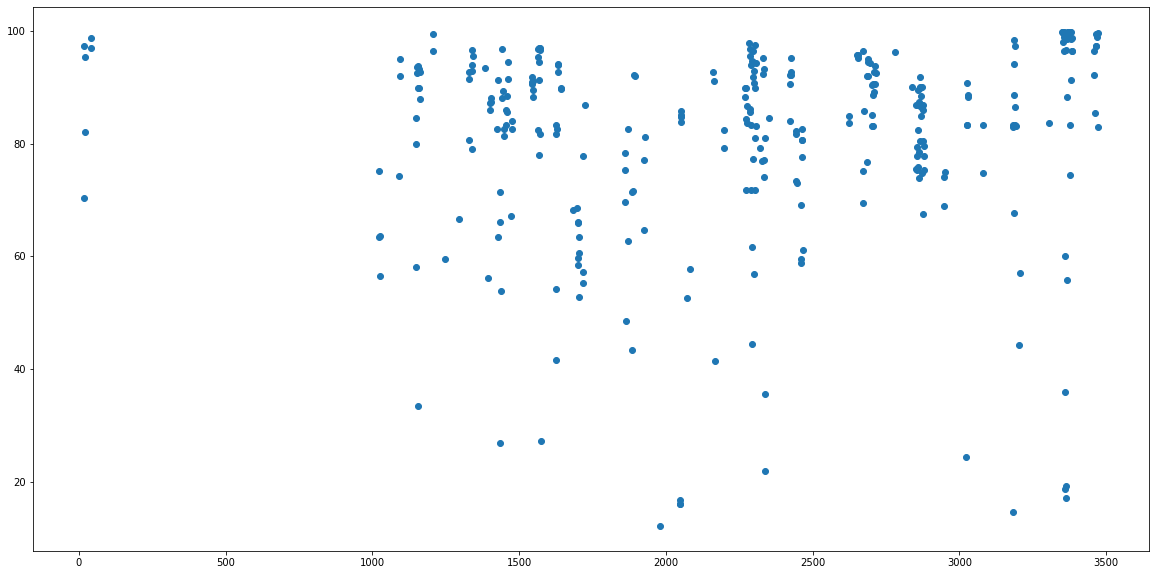

In [29]:
#scatter plot of data points
cols =['station']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

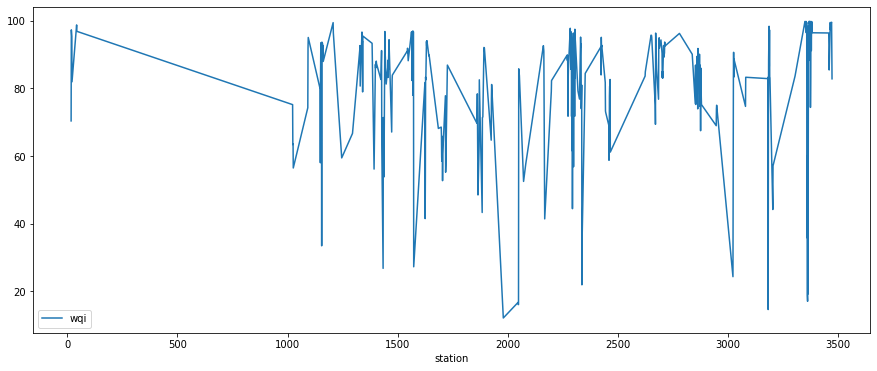

In [30]:
import matplotlib.pyplot as plt
data=data.set_index('station')
data.plot(figsize=(15,6))
plt.show()

In [31]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

,station,wqi
0,17.0,70.403605
1,18.0,97.339342
2,20.0,95.399687
3,21.0,81.971003
4,42.0,98.800940
...,...,...
314,3465.0,99.540230
315,3466.0,97.385057
316,3468.0,98.965517
317,3471.0,99.597701


In [32]:
#using linear regression to predict
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [33]:
cols =['station']
y = data['wqi']
x=data[cols]

In [34]:
reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [35]:
reg.fit(x_train,y_train)

LinearRegression()

In [36]:
a=reg.predict(x_test)
a

array([82.54011091, 80.66051511, 80.47684684, 79.41775039, 79.4452148 ,
       78.74315573, 79.72500852, 81.37802291, 79.21348381, 82.69974782,
       78.7345731 , 78.73285658, 78.51829084, 79.2254995 , 80.92314356,
       82.22598668, 82.23800236, 79.55335593, 80.77552234, 81.68184799,
       82.23456931, 82.5195126 , 79.44864786, 76.79318236, 78.64016418,
       79.20661771, 81.40033775, 79.67866232, 82.54354397, 80.72059351,
       82.70833045, 82.51607955, 81.63378526, 82.55555965, 79.41088429,
       80.77380581, 79.06242954, 79.67694579, 79.06071301, 79.56537161,
       79.29072748, 78.75688794, 81.66639926, 79.29587706, 79.58082035,
       82.52637871, 79.55507246, 78.63844765, 82.23113626, 82.05090105,
       79.65463096, 82.69803129, 81.67326536, 81.70416282, 81.37287333,
       79.6838119 , 80.71201088, 79.70955979, 81.65781663, 81.69214714,
       82.23285279, 80.00995181, 79.22378297, 81.70072977])

In [37]:
y_test

291    98.577586
134    88.288177
129    91.089901
68     89.596395
70     96.739812
         ...    
241    86.573276
267    98.405172
113    92.131226
46     26.767241
246    86.034483
Name: wqi, Length: 64, dtype: float64

In [38]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,a))

mse:325.42


In [39]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': a}) 

In [40]:
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]
x

array([[ 1.00000000e+00, -2.88728318e+00],
       [ 1.00000000e+00, -2.88600289e+00],
       [ 1.00000000e+00, -2.88344230e+00],
       [ 1.00000000e+00, -2.88216201e+00],
       [ 1.00000000e+00, -2.85527584e+00],
       [ 1.00000000e+00, -2.85399555e+00],
       [ 1.00000000e+00, -1.59930765e+00],
       [ 1.00000000e+00, -1.59802736e+00],
       [ 1.00000000e+00, -1.59674707e+00],
       [ 1.00000000e+00, -1.59546677e+00],
       [ 1.00000000e+00, -1.51096738e+00],
       [ 1.00000000e+00, -1.50968709e+00],
       [ 1.00000000e+00, -1.50840680e+00],
       [ 1.00000000e+00, -1.43927093e+00],
       [ 1.00000000e+00, -1.43799064e+00],
       [ 1.00000000e+00, -1.43671035e+00],
       [ 1.00000000e+00, -1.43543005e+00],
       [ 1.00000000e+00, -1.43414976e+00],
       [ 1.00000000e+00, -1.43158917e+00],
       [ 1.00000000e+00, -1.43030888e+00],
       [ 1.00000000e+00, -1.42902858e+00],
       [ 1.00000000e+00, -1.42518770e+00],
       [ 1.00000000e+00, -1.42390741e+00],
       [ 1.

In [41]:
alpha = 0.01 #Step size
iterations = 3000 #No. of iterations
m = y.size #No. of data points
np.random.seed(4) #Setting the seed
theta = np.random.rand(2) #Picking some random values to start with

def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)
        
    return past_thetas, past_costs

past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 80.85, 1.59


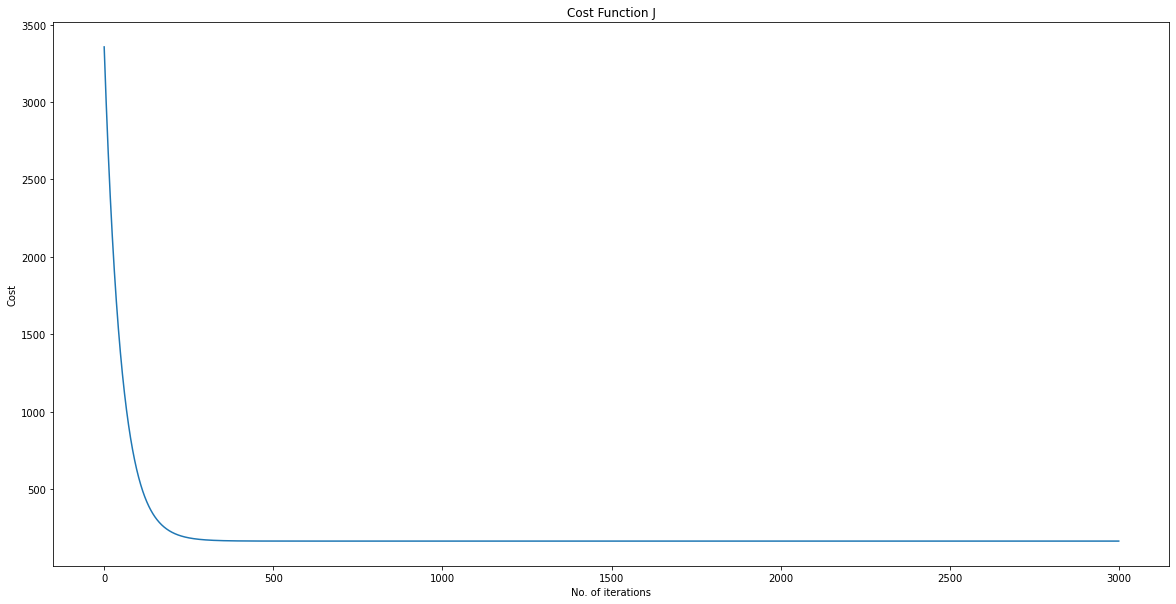

In [42]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

In [43]:
import numpy as np
newB=[80.85, 1.59]

def rmse(y,y_pred):
    rmse= np.sqrt(sum(y-y_pred))
    return rmse
   

y_pred=x.dot(newB)

dt = pd.DataFrame({'Actual': y, 'Predicted': y_pred})  
dt=pd.concat([data, dt], axis=1)
dt.tail()

,station,wqi,Actual,Predicted
314,3465.0,99.540230,99.540230,83.278200
315,3466.0,97.385057,97.385057,83.280236
316,3468.0,98.965517,98.965517,83.284307
317,3471.0,99.597701,99.597701,83.290414
318,3473.0,82.859195,82.859195,83.294485


In [44]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y,y_pred)))

18.149956081970927


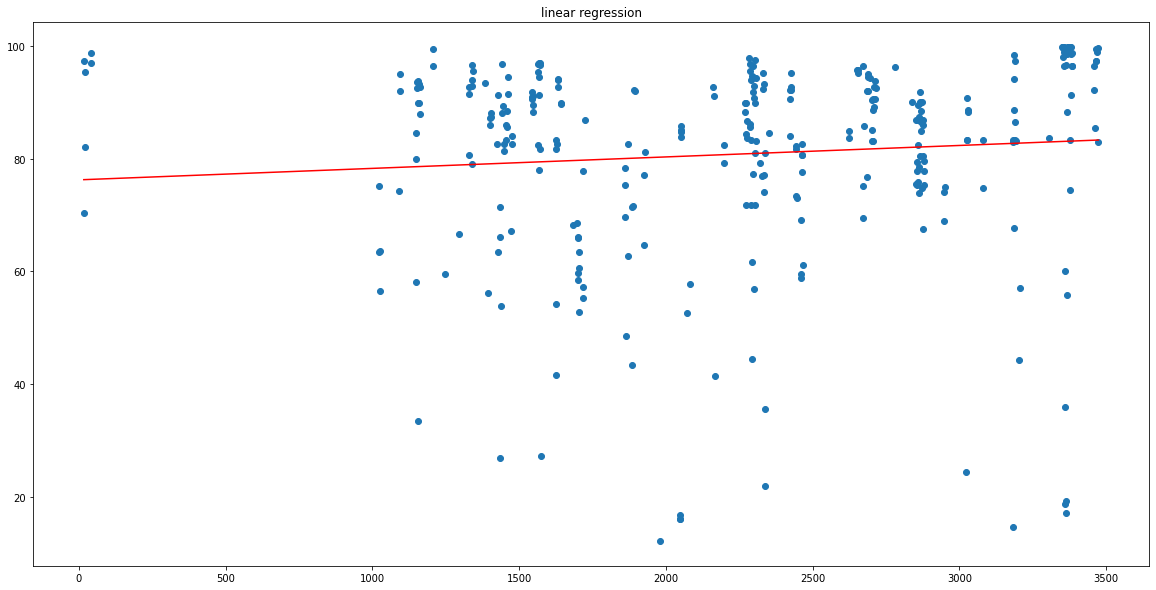

In [45]:
x_axis=dt.station
y_axis=dt.Actual
y1_axis=dt.Predicted
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,y1_axis,color='r')
plt.title("linear regression")

plt.show()

In [46]:
df1['Excellent']=df1.wqi.apply(lambda x: (1 if (100>=x>=80)  
                                              else 0))
df1['Needs attention']=df1.wqi.apply(lambda x: (1 if (79>=x>=50)  
                                              else 0))
df1['Critical']=df1.wqi.apply(lambda x: (1 if (50>=x>=0)  
                                              else 0))
df1

,station,location,state,do,ph,co,bod,na,tc,year,...,wph,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,...,40,100,0,100,100,0,90.732759,1,0,0
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,...,100,80,100,60,100,40,80.086207,1,0,0
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,...,80,100,100,60,100,40,91.293103,1,0,0
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,...,80,80,80,100,100,40,84.181034,1,0,0
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,...,100,80,100,80,100,40,83.318966,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,...,100,100,100,0,100,60,83.491379,1,0,0
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,...,0,100,100,0,100,60,74.870690,0,1,0
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,...,0,100,100,80,0,40,81.163793,1,0,0
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,...,40,100,100,80,0,40,84.612069,1,0,0


In [47]:
df1['Y']=df1.wqi.apply(lambda x: ('Excellent' if (100>=x>=80) 
                                  else('Needs improvement' if (79>=x>=50)
                                              else 'Critical')))
df1

,station,location,state,do,ph,co,bod,na,tc,year,...,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical,Y
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,...,100,0,100,100,0,90.732759,1,0,0,Excellent
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,...,80,100,60,100,40,80.086207,1,0,0,Excellent
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,...,100,100,60,100,40,91.293103,1,0,0,Excellent
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,...,80,80,100,100,40,84.181034,1,0,0,Excellent
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,...,80,100,80,100,40,83.318966,1,0,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,...,100,100,0,100,60,83.491379,1,0,0,Excellent
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,...,100,100,0,100,60,74.870690,0,1,0,Needs improvement
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,...,100,100,80,0,40,81.163793,1,0,0,Excellent
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,...,100,100,80,0,40,84.612069,1,0,0,Excellent


In [48]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [49]:
fp = r'C:\Sudhir\DP\DP 3\Women-Harrasment-in-India-master\Igismap\Indian_States.shp'
map_df = gpd.read_file(fp)
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


<AxesSubplot:>

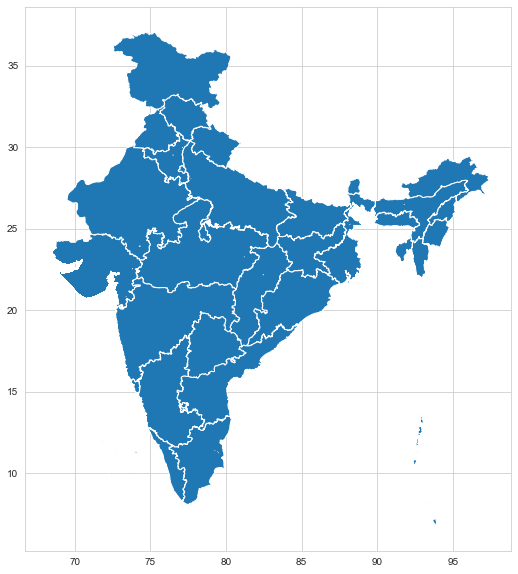

In [50]:
map_df.plot()

In [51]:
#state_wqi_values = df1[['state', 'wqi']]
#state_wqi_values.head()

In [52]:
df1.groupby(state)
df1

,station,location,state,do,ph,co,bod,na,tc,year,...,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical,Y
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,...,100,0,100,100,0,90.732759,1,0,0,Excellent
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,...,80,100,60,100,40,80.086207,1,0,0,Excellent
3,1475.0,ZUARI AT PANCHAWADI,GOA,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,...,100,100,60,100,40,91.293103,1,0,0,Excellent
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,GOA,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,...,80,80,100,100,40,84.181034,1,0,0,Excellent
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,GOA,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,...,80,100,80,100,40,83.318966,1,0,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",TAMILNADU,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,...,100,100,0,100,60,83.491379,1,0,0,Excellent
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",TAMILNADU,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,...,100,100,0,100,60,74.870690,0,1,0,Needs improvement
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",TRIPURA,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,...,100,100,80,0,40,81.163793,1,0,0,Excellent
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",TRIPURA,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,...,100,100,80,0,40,84.612069,1,0,0,Excellent


In [53]:
#import sys
#for i in range (1,len(df1)+1):
if df1['state'][i]== "TAMILNADU":
        df1['state'][i] = "TAMIL NADU"
elif df1['state'][i]== "ORISSA":
        df1['state'][i] = "ODISHA"
elif df1['state'][i]== "tripura":
        df1['state'][i] = "TRIPURA"
elif df1['state'][i]== "DAMAN, DIU, DADRA NAGAR HAVELI":
        df1['state'][i] = "DAMAN & DIU"
#df1.head()

NameError: name 'i' is not defined

In [54]:
import sys
for i in range (1,len(df1)+1):
    if df1['state'][i]== "ANDHRA PRADESH":
        df1['state'][i] = "Andhra Pradesh"
    elif df1['state'][i]== "DAMAN & DIU":
        df1['state'][i] = "Daman & Diu" 
    elif df1['state'][i]== "CHANDIGARH":
        df1['state'][i] = "Chandigarh" 
    elif df1['state'][i]== "GOA":
        df1['state'][i] = "Goa"
    elif df1['state'][i]== "GUJARAT":
        df1['state'][i] = "Gujarat"
    elif df1['state'][i]== "HARYANA":
        df1['state'][i] = "Haryana"
    elif df1['state'][i]== "HIMACHAL PRADESH":
        df1['state'][i] = "Himachal Pradesh"
    elif df1['state'][i]== "KARNATAKA":
        df1['state'][i] = "Karnataka"
    elif df1['state'][i]== "KERALA":
        df1['state'][i] = "Kerala"
    elif df1['state'][i]== "MADHYA PRADESH":
        df1['state'][i] = "Madhya Pradesh"
    elif df1['state'][i]== "MAHARASHTRA":
        df1['state'][i] = "Maharashtra"
    elif df1['state'][i]== "MANIPUR":
        df1['state'][i] = "Manipur"
    elif df1['state'][i]== "MEGHALAYA":
        df1['state'][i] = "Meghalaya"
    elif df1['state'][i]== "MIZORAM":
        df1['state'][i] = "Mizoram"
    elif df1['state'][i]== "ODISHA":
        df1['state'][i] = "Odisha"
    elif df1['state'][i]== "PONDICHERRY":
        df1['state'][i] = "Pondicherry"
    elif df1['state'][i]== "PUNJAB":
        df1['state'][i] = "Punjab"
    elif df1['state'][i]== "RAJASTHAN":
        df1['state'][i] = "Rajasthan"
    elif df1['state'][i]== "TAMIL NADU":
        df1['state'][i] = "Tamil Nadu"
    elif df1['state'][i]== "TRIPURA":
        df1['state'][i] = "Tripura"
    elif df1['state'][i]== "TAMILNADU":
        df1['state'][i] = "Tamil Nadu"
    elif df1['state'][i]== "ORISSA":
        df1['state'][i] = "Odisha"
    elif df1['state'][i]== "tripura":
        df1['state'][i] = "Tripura"
    elif df1['state'][i]== "DAMAN, DIU, DADRA NAGAR HAVELI":
        df1['state'][i] = "Daman & Diu"
df1

c:\sudhir\jupyter\envs\test_env\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\sudhir\jupyter\envs\test_env\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\sudhir\jupyter\envs\test_env\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\sudhir\jupyter\envs\

,station,location,state,do,ph,co,bod,na,tc,year,...,wdo,wbod,wec,wna,wco,wqi,Excellent,Needs attention,Critical,Y
1,1393.0,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",Daman & Diu,31.6,6.5,33.6,6.88394,0.100000,401074.321068,2014.0,...,100,0,100,100,0,90.732759,1,0,0,Excellent
2,1399.0,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,Goa,5.7,7.2,189.0,2.00000,0.200000,8391.000000,2014.0,...,80,100,60,100,40,80.086207,1,0,0,Excellent
3,1475.0,ZUARI AT PANCHAWADI,Goa,6.3,6.9,179.0,1.70000,0.100000,5330.000000,2014.0,...,100,100,60,100,40,91.293103,1,0,0,Excellent
4,3181.0,RIVER ZUARI AT BORIM BRIDGE,Goa,5.8,6.9,64.0,3.80000,0.500000,8443.000000,2014.0,...,80,80,100,100,40,84.181034,1,0,0,Excellent
5,3182.0,RIVER ZUARI AT MARCAIM JETTY,Goa,5.8,7.3,83.0,1.90000,0.400000,5500.000000,2014.0,...,80,100,80,100,40,83.318966,1,0,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1330.0,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",Tamil Nadu,7.9,7.2,738.0,2.70000,0.518000,202.000000,2003.0,...,100,100,0,100,60,83.491379,1,0,0,Excellent
1982,1450.0,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",Tamil Nadu,7.5,6.3,585.0,2.60000,0.155000,315.000000,2003.0,...,100,100,0,100,60,74.870690,0,1,0,Needs improvement
1983,1403.0,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",Tripura,7.6,6.2,98.0,1.20000,1.621228,570.000000,2003.0,...,100,100,80,0,40,81.163793,1,0,0,Excellent
1984,1404.0,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",Tripura,7.7,6.5,91.0,1.30000,1.621228,562.000000,2003.0,...,100,100,80,0,40,84.612069,1,0,0,Excellent


In [55]:
state_values = df1[['state', 'wqi', 'year']]
state_values.sort_values('year')
pd.set_option("display.max_rows", None, "display.max_columns", None)
state_values

,state,wqi,year
1,Daman & Diu,90.732759,2014.0
2,Goa,80.086207,2014.0
3,Goa,91.293103,2014.0
4,Goa,84.181034,2014.0
5,Goa,83.318966,2014.0
6,Goa,83.318966,2014.0
7,Goa,79.870690,2014.0
8,Goa,79.870690,2014.0
9,Goa,83.318966,2014.0
10,Goa,96.250000,2014.0


In [56]:
state_values.reset_index(drop = True)

,state,wqi,year
0,Daman & Diu,90.732759,2014.0
1,Goa,80.086207,2014.0
2,Goa,91.293103,2014.0
3,Goa,84.181034,2014.0
4,Goa,83.318966,2014.0
5,Goa,83.318966,2014.0
6,Goa,79.870690,2014.0
7,Goa,79.870690,2014.0
8,Goa,83.318966,2014.0
9,Goa,96.250000,2014.0


In [57]:
for i in range(len(state_values)):
    if state_values.year[i]==2014:
        TN = state_values.year()

KeyError: 0

In [58]:
TN = pd.DataFrame(state_values.loc[state_values['state'] == 'Tamil Nadu'])

In [59]:
Goa = pd.DataFrame(state_values.loc[state_values['state'] == 'Goa'])

In [60]:
Kerala = pd.DataFrame(state_values.loc[state_values['state'] == 'Kerala'])

In [61]:
state3= pd.concat([TN, Goa, Kerala])
state3

,state,wqi,year
160,Tamil Nadu,83.491379,2014.0
161,Tamil Nadu,94.655172,2014.0
162,Tamil Nadu,87.974138,2014.0
163,Tamil Nadu,91.422414,2014.0
164,Tamil Nadu,88.405172,2014.0
165,Tamil Nadu,91.206897,2014.0
166,Tamil Nadu,90.560345,2014.0
167,Tamil Nadu,83.491379,2014.0
168,Tamil Nadu,83.491379,2014.0
169,Tamil Nadu,91.206897,2014.0


In [62]:
tnavg = TN.groupby('year').wqi.mean()
tnavg = tnavg.drop(2003, axis=0)
tnavg = tnavg.drop(2010, axis=0)
tnavg

year
2005.0    90.457974
2006.0    82.920259
2007.0    89.908405
2008.0    88.750000
2009.0    84.595905
2011.0    89.612069
2012.0    85.387931
2013.0    83.870074
2014.0    83.485222
Name: wqi, dtype: float64

<AxesSubplot:title={'center':'TN WQI from 2005-2014'}, xlabel='year', ylabel='wqi'>

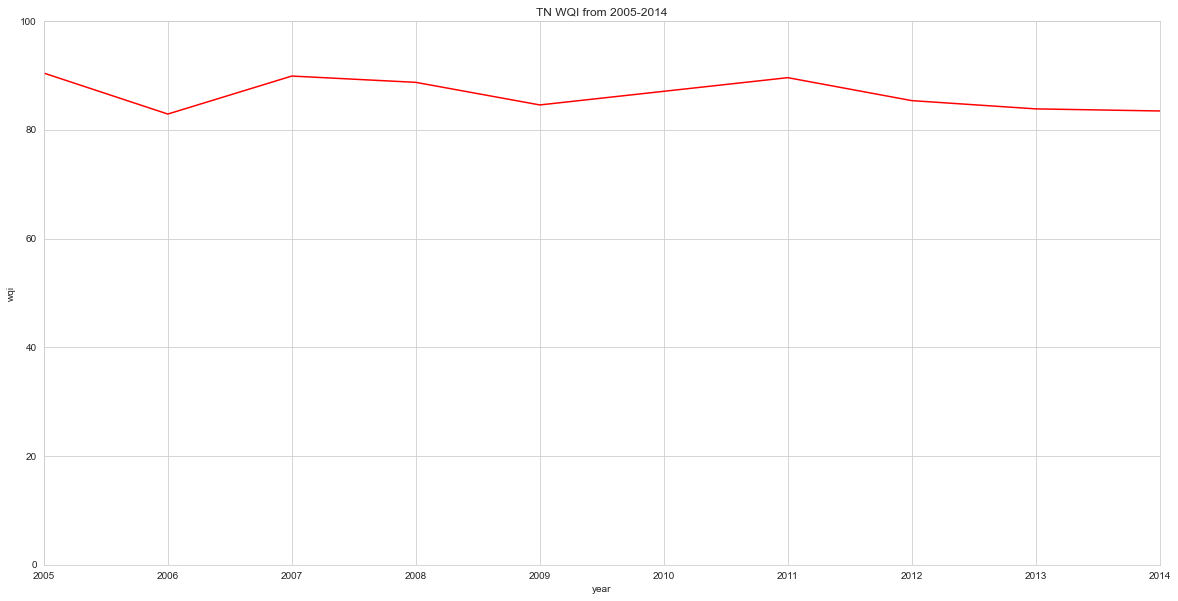

In [63]:
tnavg.plot.line(x='wqi', y='year', color='red', xlabel = 'year', ylabel = 'wqi', title='TN WQI from 2005-2014', ylim=(0,100), xlim=(2005,2014))

In [64]:
goaavg = Goa.groupby('year').wqi.mean()
goaavg = goaavg.drop(2003, axis=0)
goaavg = goaavg.drop(2004, axis=0)
goaavg

year
2005.0    83.676724
2006.0    86.866379
2007.0    91.301724
2008.0    96.112853
2009.0    76.103448
2011.0    87.218560
2012.0    85.889778
2013.0    85.894397
2014.0    83.611453
Name: wqi, dtype: float64

<AxesSubplot:title={'center':'Goa WQI from 2005-2014'}, xlabel='year', ylabel='wqi'>

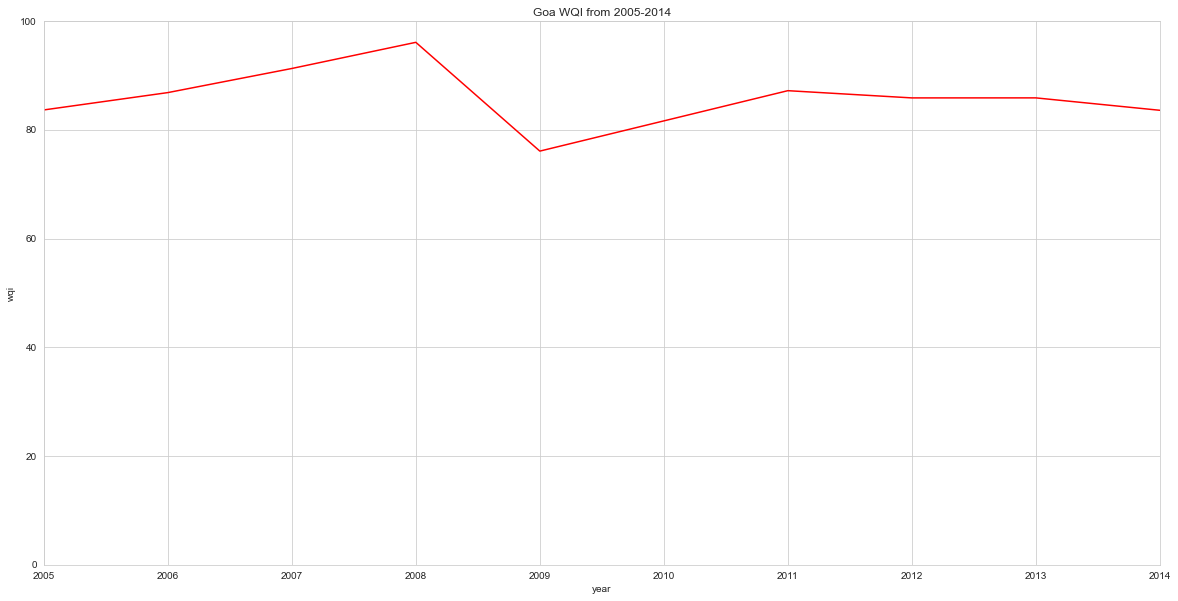

In [65]:
goaavg.plot.line(x='wqi', y='year', color='red', xlabel = 'year', ylabel = 'wqi', title='Goa WQI from 2005-2014', ylim=(0,100), xlim=(2005,2014))

In [66]:
klavg = Kerala.groupby('year').wqi.mean()
klavg = klavg.drop(2003, axis=0)
klavg = klavg.drop(2010, axis=0)
klavg

year
2005.0    87.574316
2006.0    83.853140
2007.0    84.034791
2008.0    85.057920
2009.0    85.786889
2011.0    85.343437
2012.0    85.084993
2013.0    86.070908
2014.0    84.871297
Name: wqi, dtype: float64

<AxesSubplot:title={'center':'Kerala WQI from 2005-2014'}, xlabel='year', ylabel='wqi'>

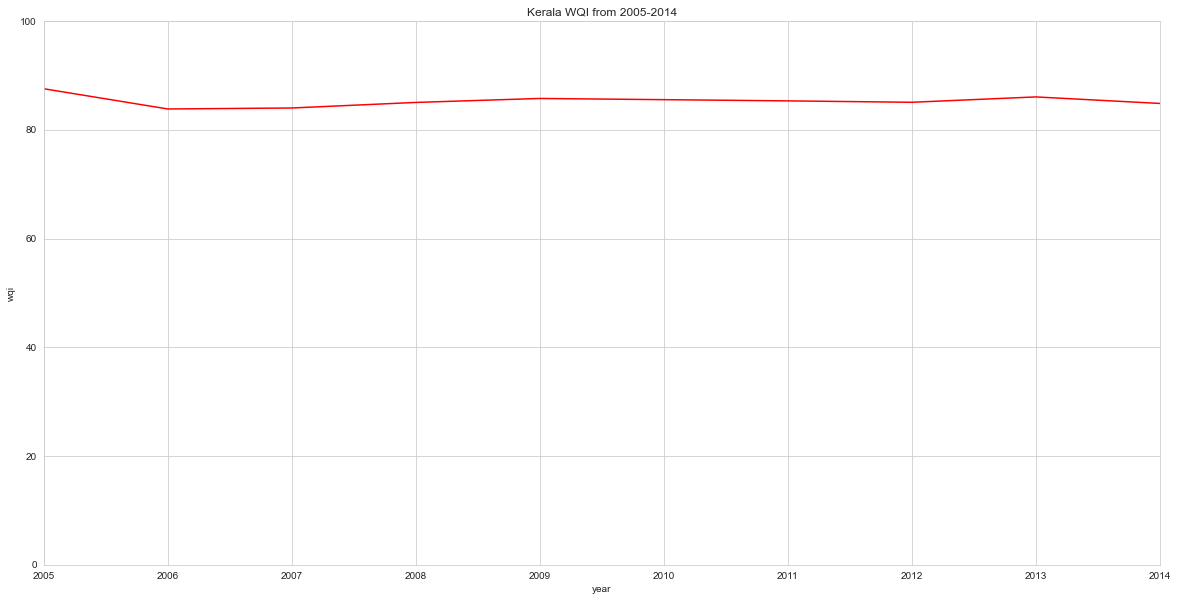

In [67]:
klavg.plot.line(x='wqi', y='year', color='red', xlabel = 'year', ylabel = 'wqi', title='Kerala WQI from 2005-2014', ylim=(0,100), xlim=(2005,2014))

In [68]:
#state_wqi_values = pd.DataFrame(state_values.groupby('state').wqi.mean())
state_wqi_values = state_wqi_values.sort_values(['year'])
state_wqi_values

NameError: name 'state_wqi_values' is not defined

In [69]:
#State wise WQI
state_wqi_values = pd.DataFrame(state_values.groupby('state')["wqi"].mean())
state_wqi_values

,wqi
state,
Andhra Pradesh,79.784483
Chandigarh,32.877155
Daman & Diu,71.626588
Goa,85.955726
Gujarat,63.657058
Haryana,59.246957
Himachal Pradesh,78.429803
Karnataka,93.581897
Kerala,85.651707


In [70]:
mp=state_wqi_values.reset_index(level=0,inplace=False)
#mp1=pd.DataFrame(mp.wqi.round(2))
mp1=mp.round(2)
mp1

,state,wqi
0,Andhra Pradesh,79.78
1,Chandigarh,32.88
2,Daman & Diu,71.63
3,Goa,85.96
4,Gujarat,63.66
5,Haryana,59.25
6,Himachal Pradesh,78.43
7,Karnataka,93.58
8,Kerala,85.65
9,Madhya Pradesh,83.66


In [71]:
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [72]:
merged = map_df.set_index('st_nm').join(mp1.set_index('state'))
merged

,geometry,wqi
st_nm,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",NaN
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",NaN
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",32.88
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",NaN
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",NaN
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",71.63
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",85.96


Text(0.5, 1.0, 'State Wise WQI value')

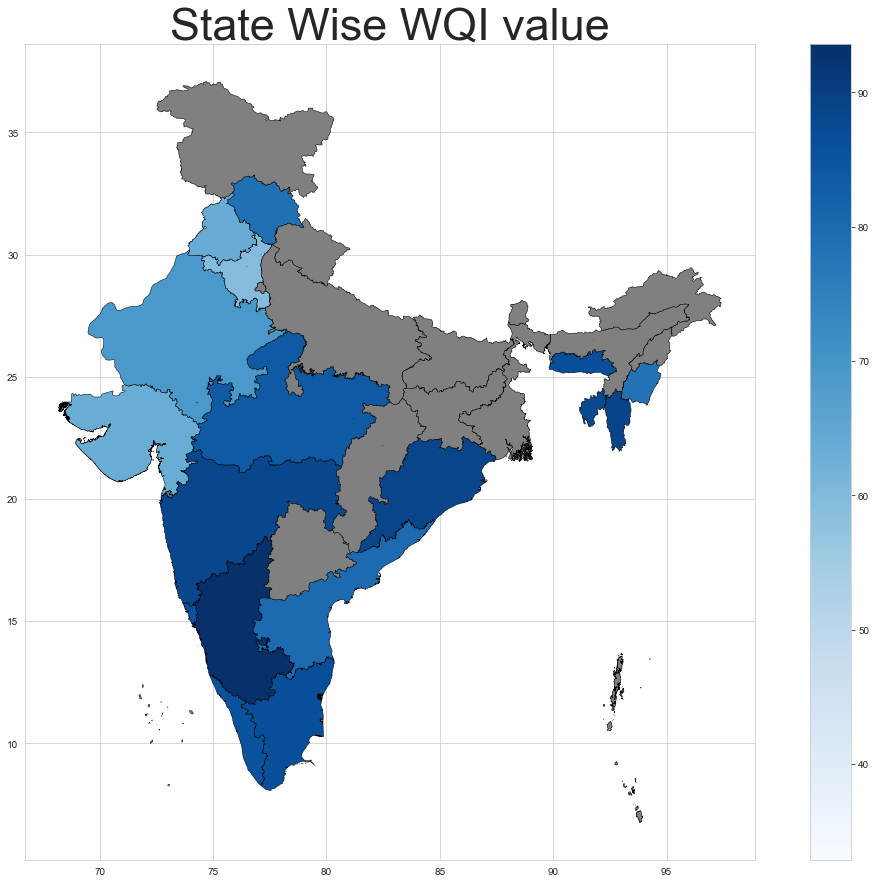

In [73]:
fig, ax = plt.subplots(1, figsize=(20, 15))
ax=merged.plot(column='wqi', cmap='Blues', linewidth=0.5, ax=ax, edgecolor='Black', legend=True, missing_kwds={"color": "grey","edgecolor": "Black"})
ax.set_title('State Wise WQI value', fontdict= {'fontsize':45, 'fontweight':3})


Text(90, 23, '87.79')

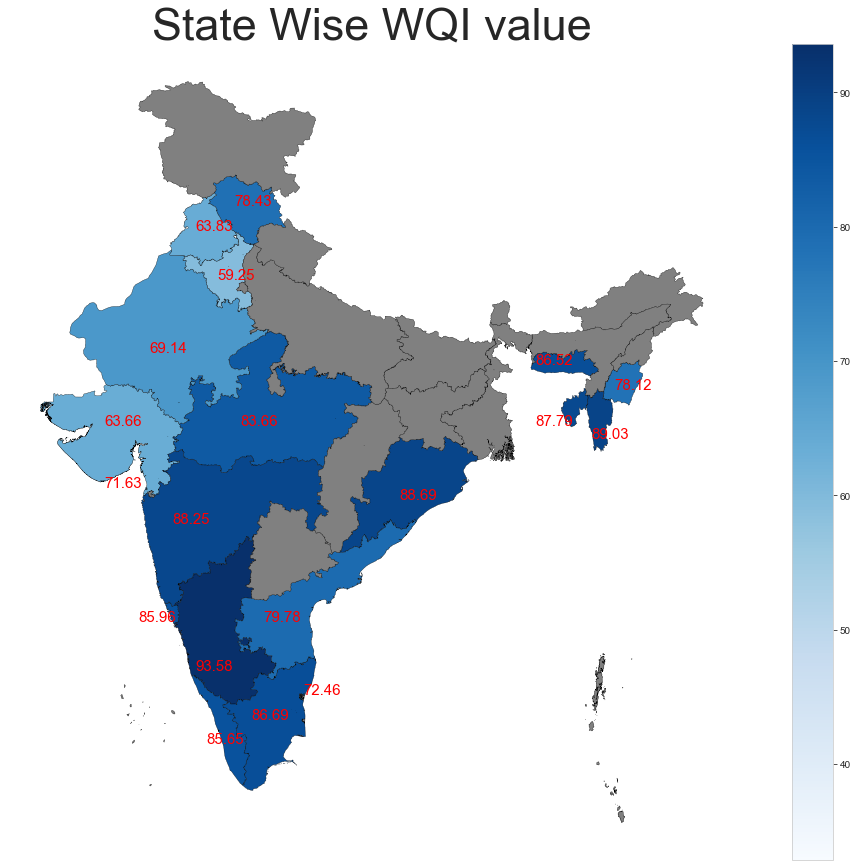

In [74]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(20,15))
ax.axis('off')

ax=merged.plot(column='wqi', cmap='Blues', linewidth=0.3, ax=ax, edgecolor='black', legend=True, missing_kwds={"color": "grey","edgecolor": "black"})
ax.set_title('State Wise WQI value', fontdict= {'fontsize':45, 'fontweight':3})
#fig, ax = plt.subplots()


#Andhra Pradesh 
ax.text(78,15, mp1.wqi[0], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Daman & Diu 
ax.text(71,20.5, mp1.wqi[2], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Goa 
ax.text(72.5,15, mp1.wqi[3], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Gujarat 
ax.text(71,23, mp1.wqi[4], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Haryana 
ax.text(76,29, mp1.wqi[5], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Himachal Pradesh  
ax.text(76.75,32, mp1.wqi[6], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Karnataka  
ax.text(75,13, mp1.wqi[7], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Kerala  
ax.text(75.5,10, mp1.wqi[8], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Madhya Pradesh  
ax.text(77,23, mp1.wqi[9], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Maharashtra  
ax.text(74,19, mp1.wqi[10], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Manipur
ax.text(93.5,24.5, mp1.wqi[11], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Meghalaya  
ax.text(90,25.5, mp1.wqi[12], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Mizoram  
ax.text(92.5,22.5, mp1.wqi[13], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Odisha 
ax.text(84,20, mp1.wqi[15], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Pondicherry  
ax.text(79.8,12, mp1.wqi[16], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Punjab  
ax.text(75,31, mp1.wqi[17], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Rajasthan 
ax.text(73,26, mp1.wqi[18], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Tamil Nadu
ax.text(77.5,11, mp1.wqi[19], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))
#Tripura  
ax.text(90, 23, mp1.wqi[20], color='red', fontsize=15, bbox=dict( facecolor='none', edgecolor='none'))